In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, warnings
%matplotlib inline
warnings.filterwarnings(action = 'ignore')

In [2]:
np.random.seed(1)
plt.style.use('seaborn')

In [3]:
X = 2 * np.random.rand(1000, 1).astype(float)
y = 4 + 3*X + np.random.randn(1000,1). astype(float)

X_b = np.c_[np.ones((1000,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)

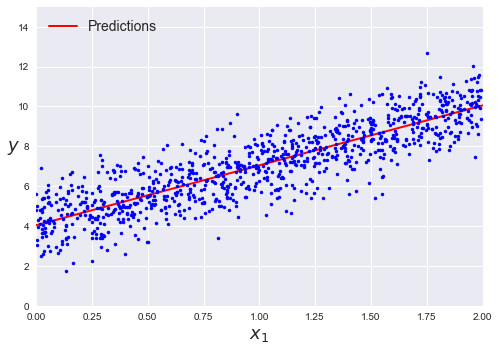

In [4]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [6]:
print(reg.intercept_, reg.coef_)
print(theta_best)

[4.04199781] [[3.00531686]]
[[4.04199781]
 [3.00531686]]


In [7]:
eta = 0.01
n_iterations = 1000
m = 1000
theta = np.random.randn(2,1)

for iteration in range(n_iterations) :
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta

array([[3.98249087],
       [3.055695  ]])

In [8]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

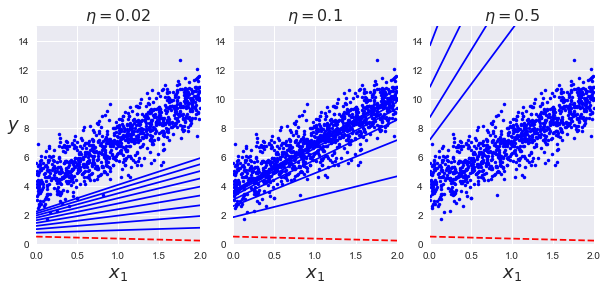

In [9]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

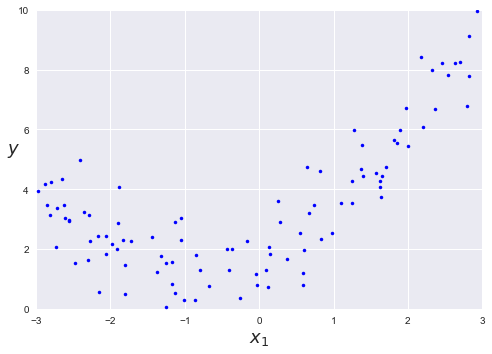

In [10]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [11]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
reg = LinearRegression()
res = reg.fit(X_poly, y)
print(res.intercept_, res.coef_)

[1.81272494] [[0.9457151  0.55985611]]


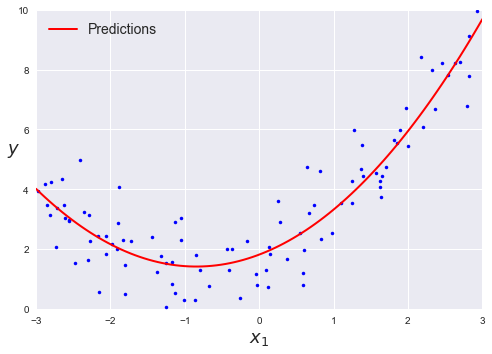

In [12]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

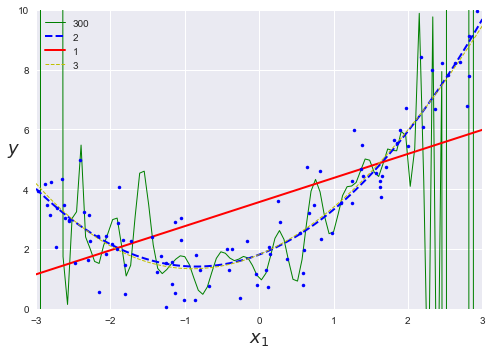

In [13]:
for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1), ("y--", 1, 3)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

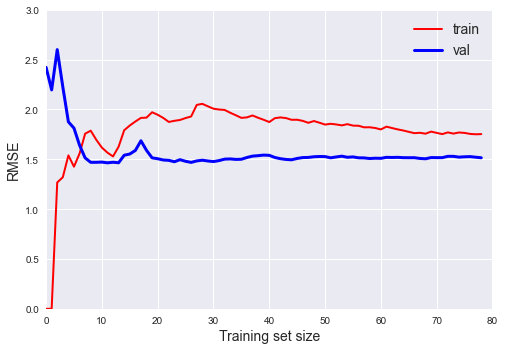

In [14]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              
    
    lin_reg = LinearRegression()
    
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                           
plt.show() 

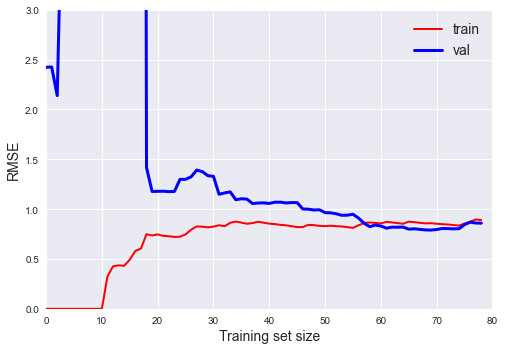

In [15]:
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])       
plt.show()                       

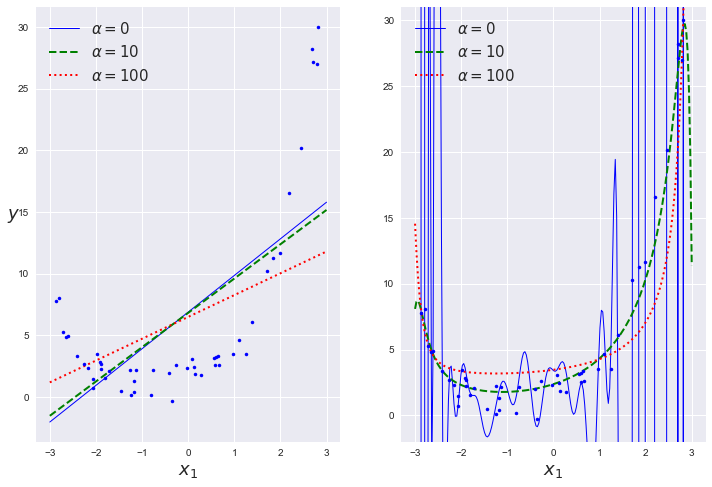

In [16]:
from sklearn.linear_model import Ridge

np.random.seed(42)
m = 50
X = 6 * np.random.rand(m, 1) - 3
y =  0.2 * X**4 + 0.4 * X**3 + 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
X_new = np.linspace(-3, 3, 200).reshape(200, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=40, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
   # plt.axis([0, 3, 0, 4])

plt.style.use('seaborn')
plt.figure(figsize=(12,8))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10, 100), random_state=42)
plt.ylim((-2,31))
plt.show()

In [17]:
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[11.30027687]])

100%|██████████| 1000/1000 [00:00<00:00, 4658.40it/s]


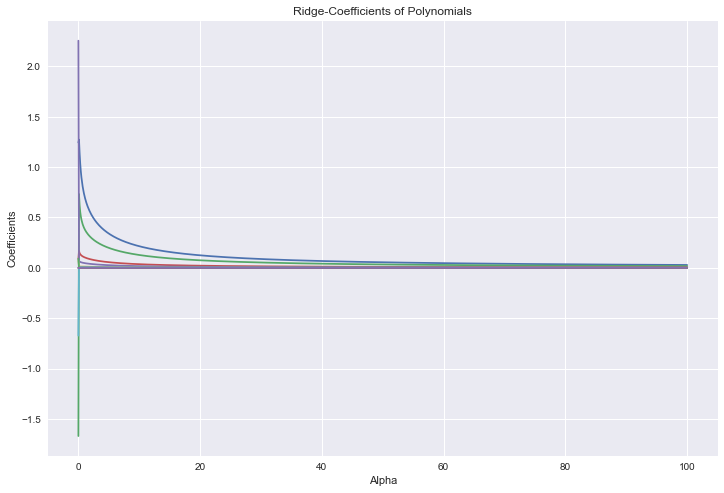

In [18]:
from tqdm import tqdm

poly = PolynomialFeatures(degree=10, include_bias=False)
X1 = poly.fit_transform(X)
alphas = np.linspace(0,100,1000)
coefs = []

for alpha in tqdm(alphas):
    ridge = Ridge(alpha=alpha, normalize=True)
    ridge.fit(X1, y)
    coefs.append(ridge.coef_)

    
plt.figure(figsize=(12,8))
for i in range(10):
    plt.plot(alphas,np.array([coefs[x][0][i] for x in range(len(coefs))]))
plt.title('Ridge-Coefficients of Polynomials')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.show()

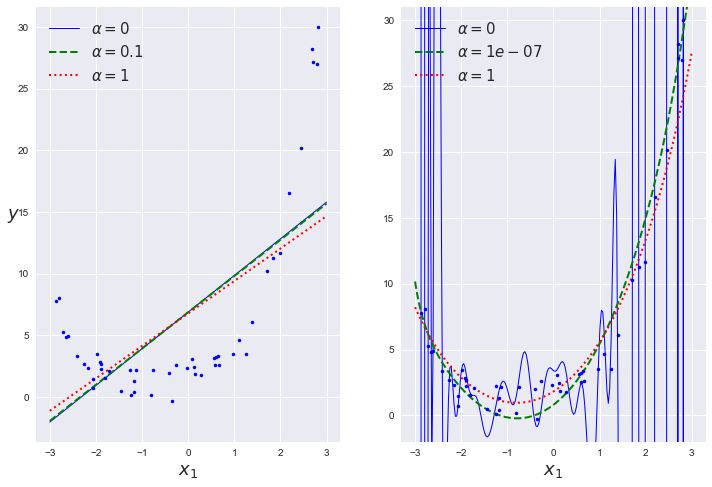

In [19]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(12,8))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)
plt.ylim((-2,31))
plt.show()

100%|██████████| 1000/1000 [00:00<00:00, 4179.47it/s]


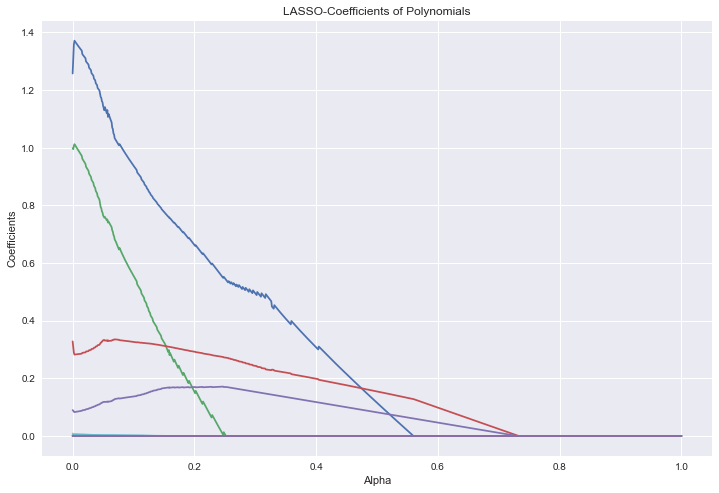

In [20]:
poly = PolynomialFeatures(degree=10, include_bias=False)
X1 = poly.fit_transform(X)
alphas = np.linspace(0,1,1000)
coefs = []

for alpha in tqdm(alphas):
    lasso = Lasso(alpha=alpha, tol=0.01, normalize=True)
    lasso.fit(X1, y)
    coefs.append(lasso.coef_)

    
plt.figure(figsize=(12,8))
for i in range(10):
    plt.plot(alphas, np.array([coefs[x][i] for x in range(len(coefs))]))
plt.title('LASSO-Coefficients of Polynomials')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.show()

In [21]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([11.27485542])

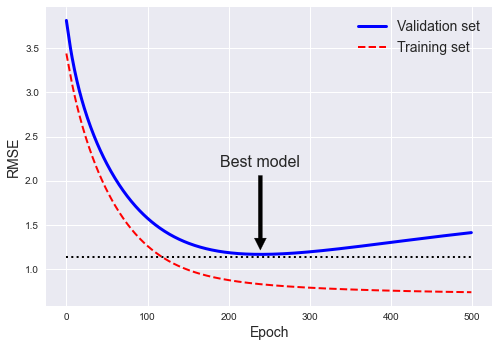

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,
                       tol=-np.infty,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

In [23]:
df = pd.read_csv('(8-5) Regularized models/data/data.csv', index_col=0, parse_dates=True)
df.head()

,Symbol,rk_twoscale,rk_th2,close_price,rv5,rv5_ss,open_price,rv10,rk_parzen,rsv,medrv,bv_ss,rsv_ss,open_time,rv10_ss,nobs,bv,open_to_close,close_time
2000-01-03 00:00:00+00:00,.AEX,0.000103,0.000102,675.44,0.000130,0.000130,675.67,0.000178,0.000179,0.000046,0.000050,0.000100,0.000046,90101.0,0.000178,1795.0,0.000100,-0.000340,163015.0
2000-01-04 00:00:00+00:00,.AEX,0.000199,0.000201,642.25,0.000201,0.000201,664.20,0.000261,0.000423,0.000147,0.000075,0.000207,0.000147,90416.0,0.000261,1785.0,0.000207,-0.033606,163016.0
2000-01-05 00:00:00+00:00,.AEX,0.000325,0.000345,632.31,0.000491,0.000491,633.37,0.000714,0.000324,0.000328,0.000166,0.000361,0.000328,90016.0,0.000714,1801.0,0.000361,-0.001675,163016.0
2000-01-06 00:00:00+00:00,.AEX,0.000218,0.000221,624.21,0.000225,0.000225,632.46,0.000182,0.000219,0.000116,0.000152,0.000258,0.000116,90016.0,0.000182,1799.0,0.000258,-0.013130,163002.0
2000-01-07 00:00:00+00:00,.AEX,0.000126,0.000123,644.86,0.000138,0.000138,628.93,0.000157,0.000155,0.000048,0.000039,0.000130,0.000048,90046.0,0.000157,1798.0,0.000130,0.025013,163016.0


In [24]:
df.Symbol.unique()

array(['.AEX', '.AORD', '.BFX', '.BSESN', '.BVLG', '.BVSP', '.DJI',
       '.FCHI', '.FTMIB', '.FTSE', '.GDAXI', '.GSPTSE', '.HSI', '.IBEX',
       '.IXIC', '.KS11', '.KSE', '.MXX', '.N225', '.NSEI', '.OMXC20',
       '.OMXHPI', '.OMXSPI', '.OSEAX', '.RUT', '.SMSI', '.SPX', '.SSEC',
       '.SSMI', '.STI', '.STOXX50E'], dtype=object)

In [25]:
df = df.loc[df.Symbol == '.KS11']
df.head()

,Symbol,rk_twoscale,rk_th2,close_price,rv5,rv5_ss,open_price,rv10,rk_parzen,rsv,medrv,bv_ss,rsv_ss,open_time,rv10_ss,nobs,bv,open_to_close,close_time
2000-01-04 00:00:00+00:00,.KS11,0.000730,0.000745,1059.04,0.001130,0.001130,1028.33,0.000752,0.000316,0.000413,0.000350,0.000923,0.000413,100100.0,0.000752,363.0,0.000923,0.029427,134129.0
2000-01-05 00:00:00+00:00,.KS11,0.000784,0.000914,987.33,0.000753,0.000753,1006.87,0.001174,0.000697,0.000362,0.000277,0.000947,0.000362,90100.0,0.001174,603.0,0.000947,-0.019597,150029.0
2000-01-06 00:00:00+00:00,.KS11,0.000634,0.000768,960.65,0.000907,0.000907,1013.95,0.001200,0.000937,0.000657,0.000577,0.000971,0.000657,90108.0,0.001200,604.0,0.000971,-0.053999,150100.0
2000-01-07 00:00:00+00:00,.KS11,0.000913,0.001006,951.41,0.001066,0.001066,949.17,0.001314,0.000537,0.000560,0.000481,0.001224,0.000560,90100.0,0.001314,603.0,0.001224,0.002357,150030.0
2000-01-10 00:00:00+00:00,.KS11,0.000238,0.000264,987.24,0.000303,0.000303,979.56,0.000331,0.000183,0.000125,0.000207,0.000296,0.000125,90458.0,0.000331,597.0,0.000296,0.007810,150130.0


In [26]:
df_ = df[['rv5']]
df_.columns = ['rv']
for i in range(1,51):
    df_['rv_'+str(i)] = df_['rv'].shift(i)
df_ = df_.dropna()
df_.head()

,rv,rv_1,rv_2,rv_3,rv_4,rv_5,rv_6,rv_7,rv_8,rv_9,...,rv_41,rv_42,rv_43,rv_44,rv_45,rv_46,rv_47,rv_48,rv_49,rv_50
2000-03-16 00:00:00+00:00,0.000351,0.000362,0.000424,0.000232,0.000269,0.000244,0.000468,0.000382,0.000197,0.000788,...,0.000170,0.000626,0.000406,0.000270,0.000351,0.000303,0.001066,0.000907,0.000753,0.001130
2000-03-17 00:00:00+00:00,0.000238,0.000351,0.000362,0.000424,0.000232,0.000269,0.000244,0.000468,0.000382,0.000197,...,0.000534,0.000170,0.000626,0.000406,0.000270,0.000351,0.000303,0.001066,0.000907,0.000753
2000-03-20 00:00:00+00:00,0.000295,0.000238,0.000351,0.000362,0.000424,0.000232,0.000269,0.000244,0.000468,0.000382,...,0.000391,0.000534,0.000170,0.000626,0.000406,0.000270,0.000351,0.000303,0.001066,0.000907
2000-03-21 00:00:00+00:00,0.000444,0.000295,0.000238,0.000351,0.000362,0.000424,0.000232,0.000269,0.000244,0.000468,...,0.000653,0.000391,0.000534,0.000170,0.000626,0.000406,0.000270,0.000351,0.000303,0.001066
2000-03-22 00:00:00+00:00,0.000300,0.000444,0.000295,0.000238,0.000351,0.000362,0.000424,0.000232,0.000269,0.000244,...,0.000673,0.000653,0.000391,0.000534,0.000170,0.000626,0.000406,0.000270,0.000351,0.000303


In [27]:
from statsmodels.tsa.stattools import adfuller

print(adfuller(df_.rv, regression='nc')[1])
print(adfuller(df_.rv, regression='c')[1])
print(adfuller(df_.rv, regression='ct')[1])

2.2265910443985885e-08
3.3855627136125856e-14
4.8648852945951584e-14


<Figure size 576x396 with 0 Axes>

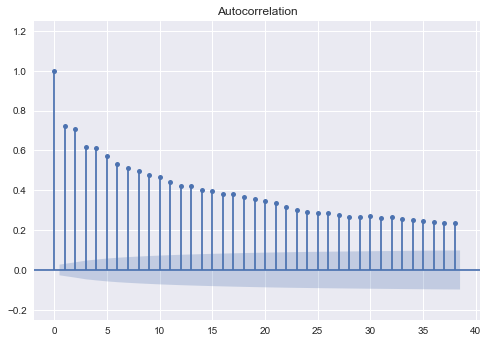

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure()
plot_acf(df_.rv)
plt.ylim([-.25,1.25])
plt.show()

<Figure size 576x396 with 0 Axes>

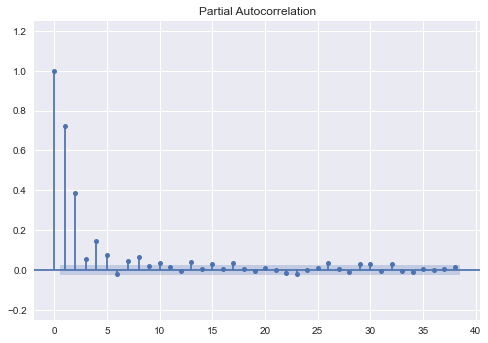

In [29]:
plt.figure()
plot_pacf(df_.rv)
plt.ylim([-.25,1.25])
plt.show()

In [30]:
y = np.log(df_.rv)
X = np.log(df_.drop('rv', axis=1))
lasso = Lasso(alpha=0.5)
lasso.fit(X,y)

Lasso(alpha=0.5)

In [31]:
lasso.coef_

array([0.27400958, 0.10558777, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

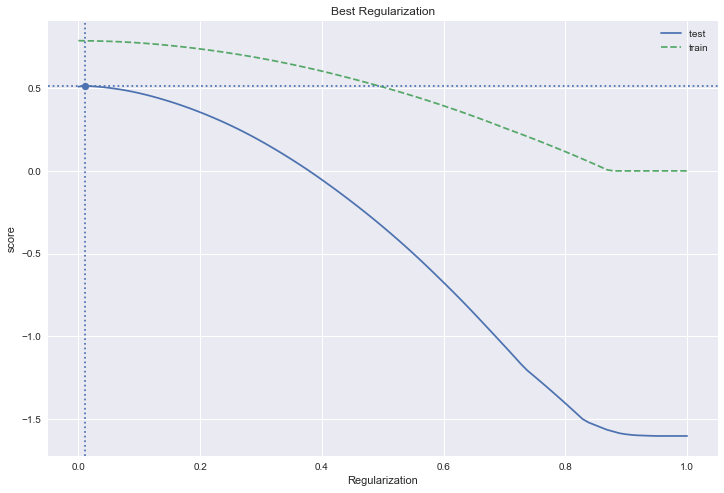

In [32]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # cross-validation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

alphas = np.linspace(0, 1, 100)

train_scores = []
test_scores = []

for alpha in alphas:
    model = Lasso(alpha=alpha)
    train_score = r2_score(y, model.fit(X, y).predict(X))
    test_score = np.mean(cross_val_score(model, X, y, scoring="r2", cv=10)) #구하고자 하는 score
    # r sqaure : 측정한 예측치가 얼마나 잘 따라가는가에 대해서 보여줌 
    train_scores.append(train_score)
    test_scores.append(test_score)
optimal_alpha = alphas[np.argmax(test_scores)]
optimal_score = np.max(test_scores)

plt.style.use('seaborn')
plt.figure(figsize=(12,8))
plt.plot(alphas, test_scores, "-", label="test ")
plt.plot(alphas, train_scores, "--", label="train")
plt.axhline(optimal_score, linestyle=':')
plt.axvline(optimal_alpha, linestyle=':')
plt.scatter(optimal_alpha, optimal_score)
plt.title("Best Regularization")
plt.ylabel('score')
plt.xlabel('Regularization')
plt.legend()
plt.show()

In [33]:
from sklearn.model_selection import GridSearchCV

alphas = np.linspace(0, 1, 101)
parameters = {'alpha': alphas }
lasso_reg = GridSearchCV(Lasso(), parameters, scoring='r2',cv=10, verbose=2)
lasso_reg.fit(X,y)

Fitting 10 folds for each of 101 candidates, totalling 1010 fits
[CV] alpha=0.0 .......................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........................................ alpha=0.0, total=   0.2s
[CV] alpha=0.0 .......................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ........................................ alpha=0.0, total=   0.2s
[CV] alpha=0.0 .......................................................
[CV] ........................................ alpha=0.0, total=   0.2s
[CV] alpha=0.0 .......................................................
[CV] ........................................ alpha=0.0, total=   0.2s
[CV] alpha=0.0 .......................................................
[CV] ........................................ alpha=0.0, total=   0.2s
[CV] alpha=0.0 .......................................................
[CV] ........................................ alpha=0.0, total=   0.2s
[CV] alpha=0.0 .......................................................
[CV] ........................................ alpha=0.0, total=   0.2s
[CV] alpha=0.0 .......................................................
[CV] ........................................ alpha=0.0, total=   0.2s
[CV] alpha=0.0 .......................................................
[CV] .

[CV] ....................................... alpha=0.08, total=   0.0s
[CV] alpha=0.08 ......................................................
[CV] ....................................... alpha=0.08, total=   0.0s
[CV] alpha=0.08 ......................................................
[CV] ....................................... alpha=0.08, total=   0.0s
[CV] alpha=0.08 ......................................................
[CV] ....................................... alpha=0.08, total=   0.0s
[CV] alpha=0.08 ......................................................
[CV] ....................................... alpha=0.08, total=   0.0s
[CV] alpha=0.08 ......................................................
[CV] ....................................... alpha=0.08, total=   0.0s
[CV] alpha=0.08 ......................................................
[CV] ....................................... alpha=0.08, total=   0.0s
[CV] alpha=0.08 ......................................................
[CV] .

[CV] ....................................... alpha=0.16, total=   0.0s
[CV] alpha=0.16 ......................................................
[CV] ....................................... alpha=0.16, total=   0.0s
[CV] alpha=0.16 ......................................................
[CV] ....................................... alpha=0.16, total=   0.0s
[CV] alpha=0.16 ......................................................
[CV] ....................................... alpha=0.16, total=   0.0s
[CV] alpha=0.16 ......................................................
[CV] ....................................... alpha=0.16, total=   0.0s
[CV] alpha=0.16 ......................................................
[CV] ....................................... alpha=0.16, total=   0.0s
[CV] alpha=0.16 ......................................................
[CV] ....................................... alpha=0.16, total=   0.0s
[CV] alpha=0.16 ......................................................
[CV] .

[CV] ....................................... alpha=0.22, total=   0.0s
[CV] alpha=0.22 ......................................................
[CV] ....................................... alpha=0.22, total=   0.0s
[CV] alpha=0.22 ......................................................
[CV] ....................................... alpha=0.22, total=   0.0s
[CV] alpha=0.22 ......................................................
[CV] ....................................... alpha=0.22, total=   0.0s
[CV] alpha=0.22 ......................................................
[CV] ....................................... alpha=0.22, total=   0.0s
[CV] alpha=0.22 ......................................................
[CV] ....................................... alpha=0.22, total=   0.0s
[CV] alpha=0.22 ......................................................
[CV] ....................................... alpha=0.22, total=   0.0s
[CV] alpha=0.22 ......................................................
[CV] .

[CV] ....................................... alpha=0.28, total=   0.0s
[CV] alpha=0.28 ......................................................
[CV] ....................................... alpha=0.28, total=   0.0s
[CV] alpha=0.28 ......................................................
[CV] ....................................... alpha=0.28, total=   0.0s
[CV] alpha=0.28 ......................................................
[CV] ....................................... alpha=0.28, total=   0.0s
[CV] alpha=0.29 ......................................................
[CV] ....................................... alpha=0.29, total=   0.0s
[CV] alpha=0.29 ......................................................
[CV] ....................................... alpha=0.29, total=   0.0s
[CV] alpha=0.29 ......................................................
[CV] ....................................... alpha=0.29, total=   0.0s
[CV] alpha=0.29 ......................................................
[CV] .

[CV] ........................ alpha=0.35000000000000003, total=   0.0s
[CV] alpha=0.35000000000000003 .......................................
[CV] ........................ alpha=0.35000000000000003, total=   0.0s
[CV] alpha=0.35000000000000003 .......................................
[CV] ........................ alpha=0.35000000000000003, total=   0.0s
[CV] alpha=0.35000000000000003 .......................................
[CV] ........................ alpha=0.35000000000000003, total=   0.0s
[CV] alpha=0.35000000000000003 .......................................
[CV] ........................ alpha=0.35000000000000003, total=   0.0s
[CV] alpha=0.36 ......................................................
[CV] ....................................... alpha=0.36, total=   0.0s
[CV] alpha=0.36 ......................................................
[CV] ....................................... alpha=0.36, total=   0.0s
[CV] alpha=0.36 ......................................................
[CV] .

[CV] ....................................... alpha=0.43, total=   0.0s
[CV] alpha=0.43 ......................................................
[CV] ....................................... alpha=0.43, total=   0.0s
[CV] alpha=0.43 ......................................................
[CV] ....................................... alpha=0.43, total=   0.0s
[CV] alpha=0.43 ......................................................
[CV] ....................................... alpha=0.43, total=   0.0s
[CV] alpha=0.43 ......................................................
[CV] ....................................... alpha=0.43, total=   0.0s
[CV] alpha=0.43 ......................................................
[CV] ....................................... alpha=0.43, total=   0.0s
[CV] alpha=0.43 ......................................................
[CV] ....................................... alpha=0.43, total=   0.0s
[CV] alpha=0.43 ......................................................
[CV] .

[CV] ....................................... alpha=0.51, total=   0.0s
[CV] alpha=0.51 ......................................................
[CV] ....................................... alpha=0.51, total=   0.0s
[CV] alpha=0.51 ......................................................
[CV] ....................................... alpha=0.51, total=   0.0s
[CV] alpha=0.51 ......................................................
[CV] ....................................... alpha=0.51, total=   0.0s
[CV] alpha=0.51 ......................................................
[CV] ....................................... alpha=0.51, total=   0.0s
[CV] alpha=0.51 ......................................................
[CV] ....................................... alpha=0.51, total=   0.0s
[CV] alpha=0.51 ......................................................
[CV] ....................................... alpha=0.51, total=   0.0s
[CV] alpha=0.51 ......................................................
[CV] .

[CV] ....................................... alpha=0.59, total=   0.0s
[CV] alpha=0.59 ......................................................
[CV] ....................................... alpha=0.59, total=   0.0s
[CV] alpha=0.6 .......................................................
[CV] ........................................ alpha=0.6, total=   0.0s
[CV] alpha=0.6 .......................................................
[CV] ........................................ alpha=0.6, total=   0.0s
[CV] alpha=0.6 .......................................................
[CV] ........................................ alpha=0.6, total=   0.0s
[CV] alpha=0.6 .......................................................
[CV] ........................................ alpha=0.6, total=   0.0s
[CV] alpha=0.6 .......................................................
[CV] ........................................ alpha=0.6, total=   0.0s
[CV] alpha=0.6 .......................................................
[CV] .

[CV] ....................................... alpha=0.68, total=   0.0s
[CV] alpha=0.68 ......................................................
[CV] ....................................... alpha=0.68, total=   0.0s
[CV] alpha=0.6900000000000001 ........................................
[CV] ......................... alpha=0.6900000000000001, total=   0.0s
[CV] alpha=0.6900000000000001 ........................................
[CV] ......................... alpha=0.6900000000000001, total=   0.0s
[CV] alpha=0.6900000000000001 ........................................
[CV] ......................... alpha=0.6900000000000001, total=   0.0s
[CV] alpha=0.6900000000000001 ........................................
[CV] ......................... alpha=0.6900000000000001, total=   0.0s
[CV] alpha=0.6900000000000001 ........................................
[CV] ......................... alpha=0.6900000000000001, total=   0.0s
[CV] alpha=0.6900000000000001 ........................................
[CV] .

[CV] ....................................... alpha=0.78, total=   0.0s
[CV] alpha=0.78 ......................................................
[CV] ....................................... alpha=0.78, total=   0.0s
[CV] alpha=0.78 ......................................................
[CV] ....................................... alpha=0.78, total=   0.0s
[CV] alpha=0.79 ......................................................
[CV] ....................................... alpha=0.79, total=   0.0s
[CV] alpha=0.79 ......................................................
[CV] ....................................... alpha=0.79, total=   0.0s
[CV] alpha=0.79 ......................................................
[CV] ....................................... alpha=0.79, total=   0.0s
[CV] alpha=0.79 ......................................................
[CV] ....................................... alpha=0.79, total=   0.0s
[CV] alpha=0.79 ......................................................
[CV] .

[CV] ....................................... alpha=0.89, total=   0.0s
[CV] alpha=0.89 ......................................................
[CV] ....................................... alpha=0.89, total=   0.0s
[CV] alpha=0.89 ......................................................
[CV] ....................................... alpha=0.89, total=   0.0s
[CV] alpha=0.89 ......................................................
[CV] ....................................... alpha=0.89, total=   0.0s
[CV] alpha=0.89 ......................................................
[CV] ....................................... alpha=0.89, total=   0.0s
[CV] alpha=0.89 ......................................................
[CV] ....................................... alpha=0.89, total=   0.0s
[CV] alpha=0.89 ......................................................
[CV] ....................................... alpha=0.89, total=   0.0s
[CV] alpha=0.9 .......................................................
[CV] .

[CV] ........................................ alpha=1.0, total=   0.0s
[CV] alpha=1.0 .......................................................
[CV] ........................................ alpha=1.0, total=   0.0s
[CV] alpha=1.0 .......................................................
[CV] ........................................ alpha=1.0, total=   0.0s
[CV] alpha=1.0 .......................................................
[CV] ........................................ alpha=1.0, total=   0.0s
[CV] alpha=1.0 .......................................................
[CV] ........................................ alpha=1.0, total=   0.0s
[CV] alpha=1.0 .......................................................
[CV] ........................................ alpha=1.0, total=   0.0s
[CV] alpha=1.0 .......................................................
[CV] ........................................ alpha=1.0, total=   0.0s
[CV] alpha=1.0 .......................................................
[CV] .

[Parallel(n_jobs=1)]: Done 1010 out of 1010 | elapsed:    7.4s finished


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])},
             scoring='r2', verbose=2)

In [34]:
lasso_reg.best_params_

{'alpha': 0.01}

In [39]:
import statsmodels.api as sm

res = sm.tsa.ARIMA(y)

/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [40]:
y = np.log(df_.rv)
X = np.log(df_.drop('rv', axis=1))
lasso = Lasso(alpha=0.01)
lasso.fit(X,y)

Lasso(alpha=0.01)

In [41]:
import seaborn as sns

df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [42]:
df.isnull().any()

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

In [43]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<AxesSubplot:>

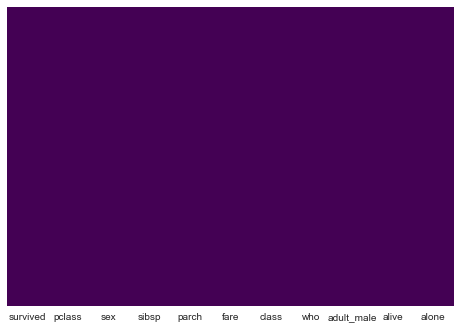

In [49]:
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [50]:
df = df.drop(['age', 'embarked', 'deck', 'embark_town'], axis=1)

KeyError: "['age', 'embarked', 'deck', 'embark_town'] not found in axis"

In [51]:
df

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


In [52]:
df.isnull().any()

survived      False
pclass        False
sex           False
sibsp         False
parch         False
fare          False
class         False
who           False
adult_male    False
alive         False
alone         False
dtype: bool

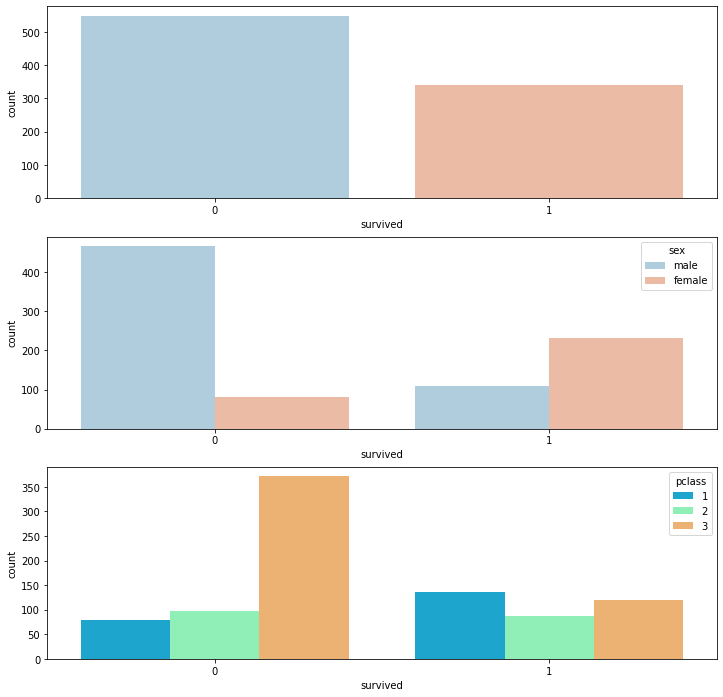

In [53]:
plt.figure(figsize = (12,12))
plt.style.use('default')
plt.subplot(311)
sns.countplot(x='survived',data=df,palette='RdBu_r')
plt.subplot(312)
sns.countplot(x='survived',hue='sex',data=df,palette='RdBu_r')
plt.subplot(313)
sns.countplot(x='survived',hue='pclass',data=df,palette='rainbow')
plt.show()

In [54]:
df = pd.read_csv('(8-6) Classification Models/data/titanic.csv', index_col=0)
df.head()

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True


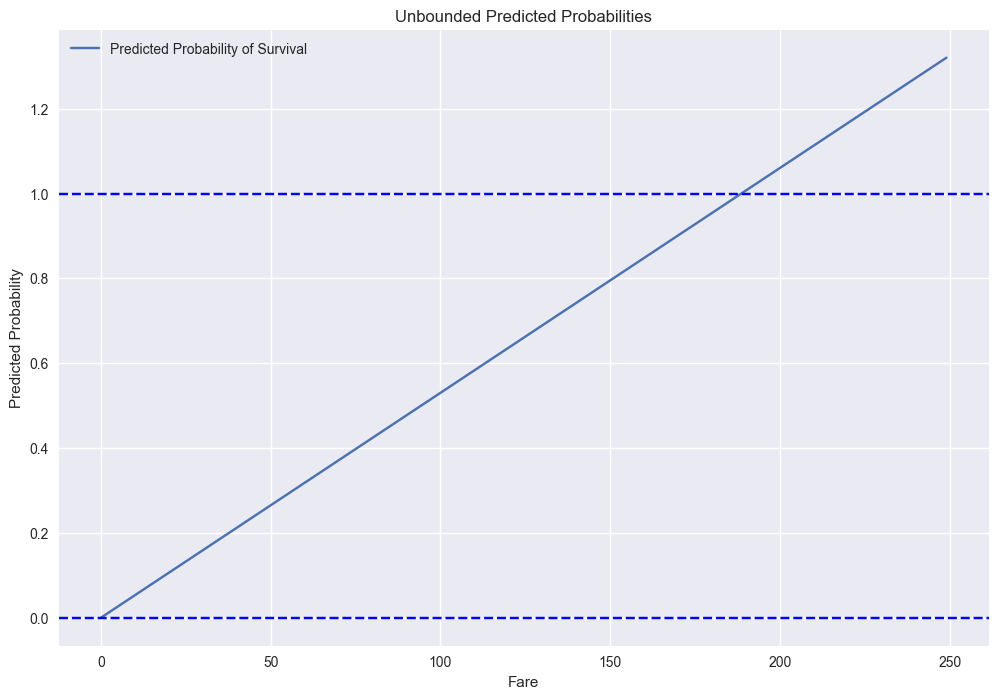

In [55]:
import statsmodels.api as sm

y = df.survived
X = df[['fare']]

ols = sm.OLS(y,X).fit()

plt.style.use('seaborn')
plt.figure(figsize=(12,8))
plt.plot(range(250), ols.predict(pd.Series(range(250))), label = 'Predicted Probability of Survival')
plt.axhline(y=1, color='b', ls = '--')
plt.axhline(y=0, color='b', ls = '--')
plt.legend()
plt.xlabel('Fare')
plt.ylabel('Predicted Probability')
plt.title('Unbounded Predicted Probabilities')
plt.show()

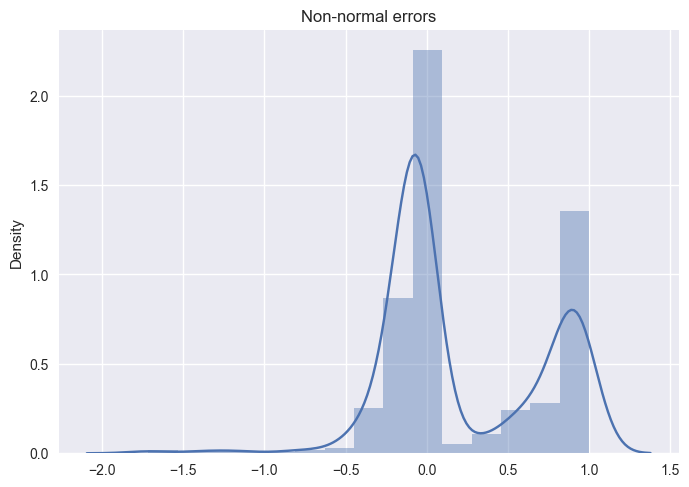

In [56]:
plt.figure()
sns.distplot(ols.resid)
plt.title('Non-normal errors')
plt.show()

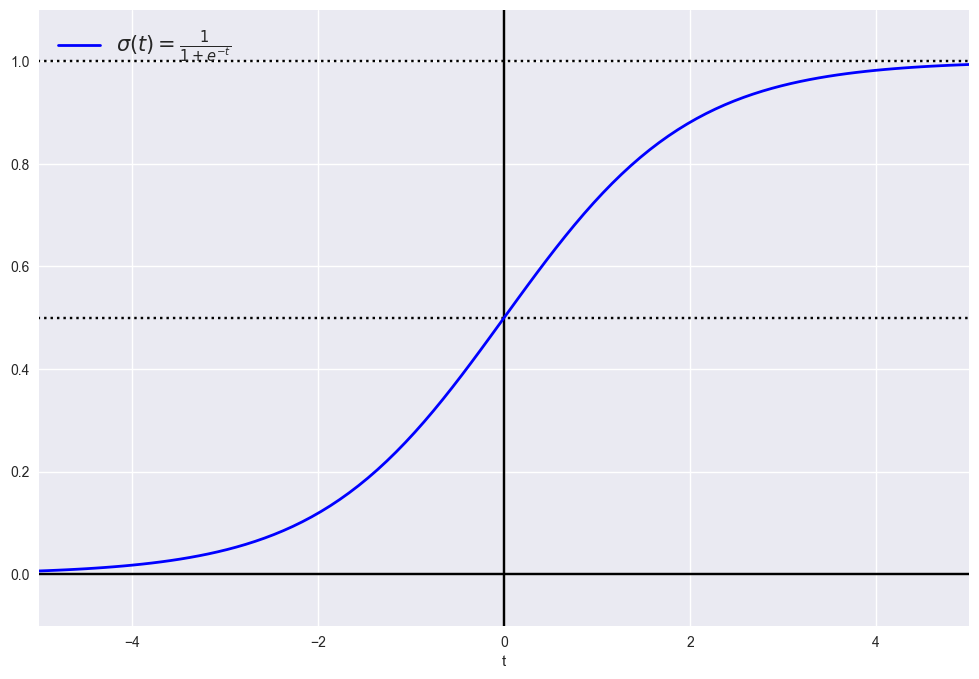

In [57]:
t = np.linspace(-5, 5, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(12, 8))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=15)
plt.axis([-5, 5, -0.1, 1.1])
plt.show()

In [58]:
temp = pd.get_dummies(df[['sex', 'class', 'adult_male', 'alone']]).replace({False: 0, True:1})
temp = pd.concat([temp, df[['pclass', 'fare', 'sibsp', 'parch']]], axis=1)
temp.head()

,adult_male,alone,sex_female,sex_male,class_First,class_Second,class_Third,pclass,fare,sibsp,parch
0,1,0,0,1,0,0,1,3,7.2500,1,0
1,0,0,1,0,1,0,0,1,71.2833,1,0
2,0,1,1,0,0,0,1,3,7.9250,0,0
3,0,0,1,0,1,0,0,1,53.1000,1,0
4,1,1,0,1,0,0,1,3,8.0500,0,0


In [59]:
temp = temp.astype(int)

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, KFold, cross_val_score

y = df.survived.astype(int)
X = temp.copy().astype(int)

lg = LogisticRegression()
lg.fit(X,y)
predicted = lg.predict(X)
accuracy_score(y,predicted)

AttributeError: 'str' object has no attribute 'decode'

In [61]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [62]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [63]:
df.isnull().any()

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

<AxesSubplot:>

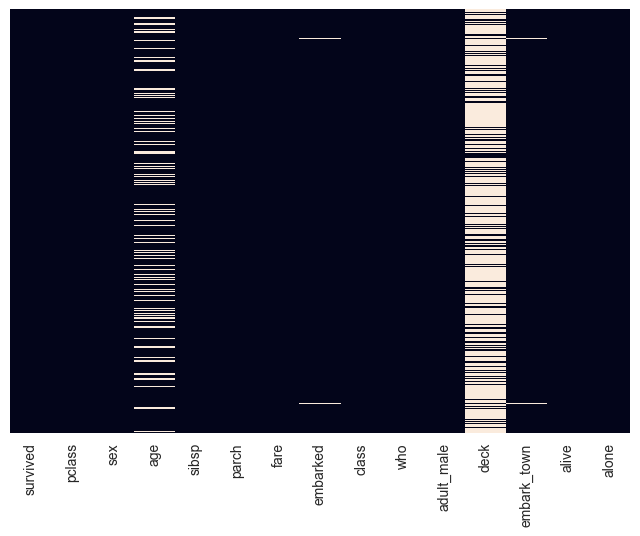

In [65]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False)

In [66]:
df = df.drop(['age', 'embarked', 'deck', 'embark_town'], axis=1)

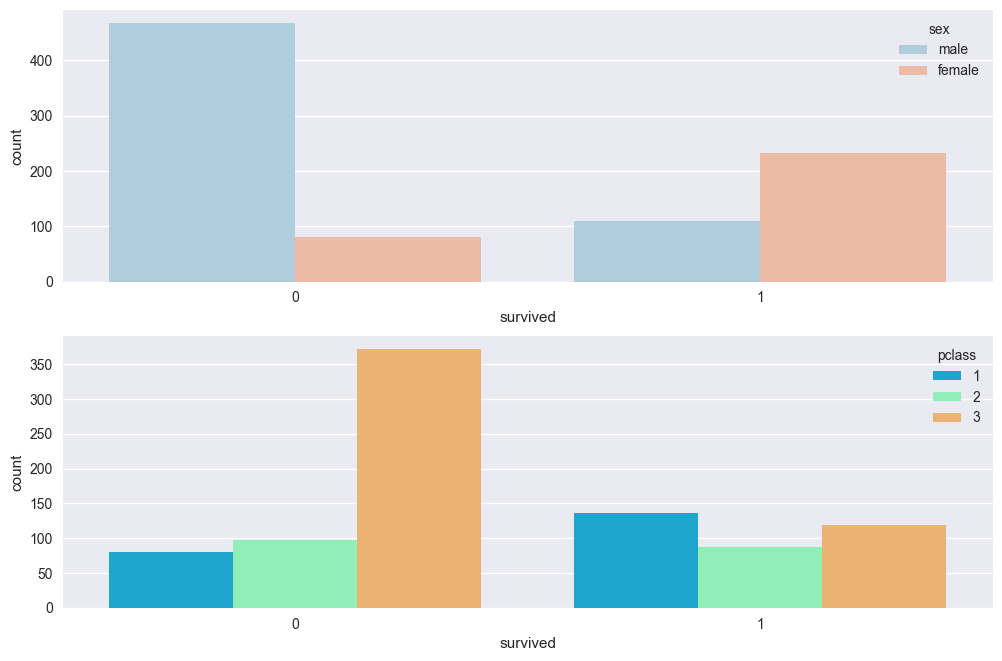

In [67]:
plt.figure(figsize=(12,12))
#plt.subplot(311)
sns.countplot(x='survived',data=df,palette='RdBu_r')
plt.subplot(312)
sns.countplot(x='survived',hue='sex',data=df,palette='RdBu_r')
plt.subplot(313)
sns.countplot(x='survived',hue='pclass',data=df,palette='rainbow')
plt.show()

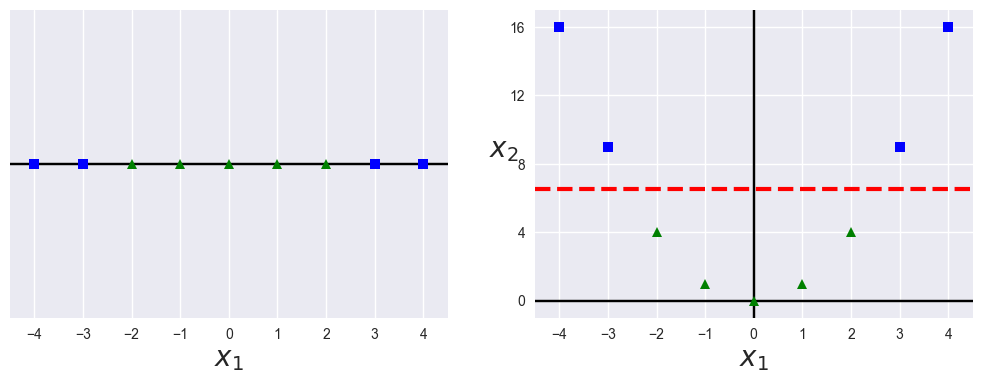

In [68]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)
plt.show()

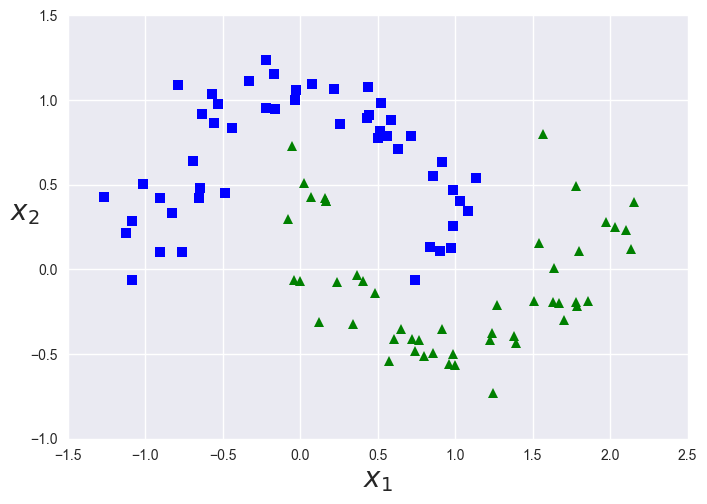

In [74]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 100, noise = 0.15)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

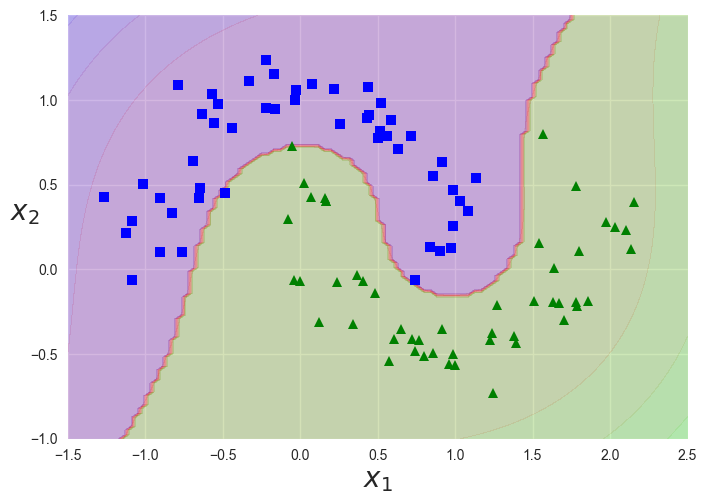

In [75]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()